<a href="https://colab.research.google.com/github/mrhamedani/Gen-AI-projects-Pytorch/blob/main/4.%20with_without_glasses_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the Dataset
The eyeglasses dataset we use is from Kaggle. Log into Kaggle and go to the link https://www.kaggle.com/datasets/jeffheaton/glasses-or-no-glasses/data to download the image folder and the two CSV files on the right

Using the Kaggle API JSON file, I saved the data set directly in the Google Colab temporary memory

In [1]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rezahamedani","key":"d5c4f587c7cea3dc259ab608e99e3a8b"}'}

In [3]:

!kaggle datasets download -d jeffheaton/glasses-or-no-glasses
!unzip glasses-or-no-glasses.zip

Streaming output truncated to the last 5000 lines.
  inflating: faces-spring-2020/faces-spring-2020/face-1000.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1001.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1002.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1003.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1004.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1005.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1006.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1007.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1008.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1009.png  
  inflating: faces-spring-2020/faces-spring-2020/face-101.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1010.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1011.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1012.png  
  inflating: faces-spring-2020/faces-spr

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os , shutil
from PIL import Image
import random
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


In [5]:
train = pd.read_csv('train.csv')
train.set_index('id',inplace=True)
test = pd.read_csv('test.csv')
test.set_index('id',inplace=True)

os.makedirs('./glasses/G/', exist_ok=True)
os.makedirs('./glasses/NoG/',exist_ok=True)

folder= "./faces-spring-2020/faces-spring-2020/"

for i in range(1, 4501):
    oldpath = f"{folder}face-{i}.png"
    if train.loc[i].glasses == 1:
        newpath = f'./glasses/G/face-{i}.png'  # A new way for pictures with glasses
        shutil.copy(oldpath, newpath)
    else:
        newpath = f'./glasses/NoG/face-{i}.png'  #A new path for glasses-free images
        shutil.copy(oldpath, newpath)

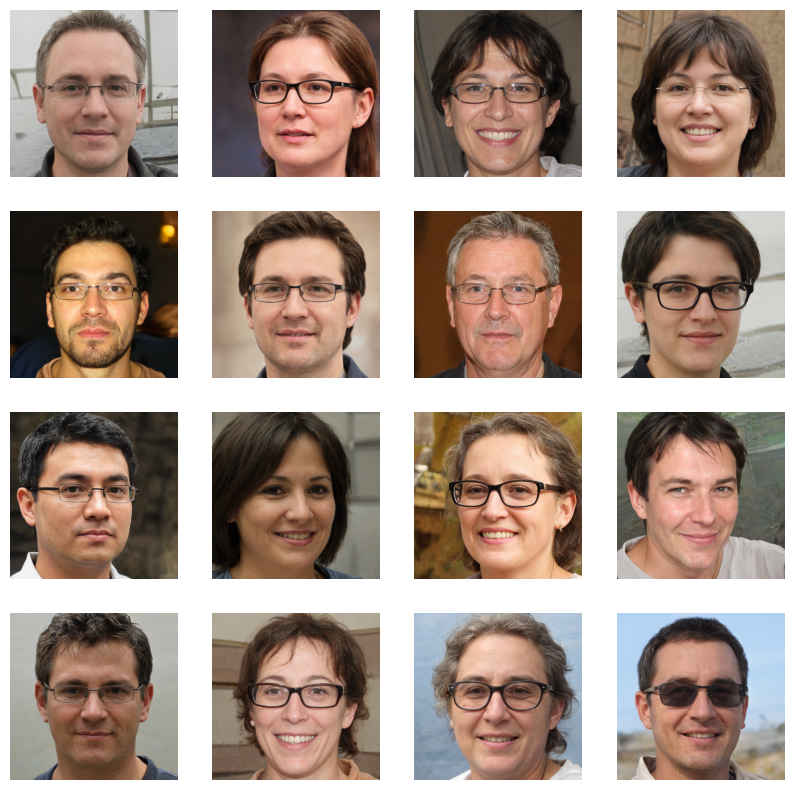

In [6]:
imgs=os.listdir('./glasses/G')
random.seed(42)
samples = random.sample(imgs, 16)
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, img in enumerate(samples):
    img_path = os.path
    ax = axs[i // 4, i % 4]
    ax.imshow(Image.open(os.path.join('./glasses/G', img)))
    ax.axis('off')
plt.show()
